In [1]:
from ecog_speech import datasets, experiments, result_parsing, utils, feature_processing, pipeline
import pandas as pd
import h5py
import numpy as np

from scipy.io import loadmat

from ecog_speech import plot_label_regions
from ecog_speech import visuals as viz

In [2]:
hvs_tuples = datasets.HarvardSentences.make_tuples_from_sets_str('UCSD-28')
hvs_tuples

[('UCSD', 28, 1, 1)]

In [3]:
hvs = datasets.HarvardSentences(hvs_tuples, pre_processing_pipeline='audio_gate_speaking_only')

2022-03-17 23:04:18,329 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - DEBUG - preparing pipeline
2022-03-17 23:04:18,333 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - DEBUG - Available pipelines: ['audio_gate', 'audio_gate_speaking_only', 'audio_gate_imagine', 'default']
2022-03-17 23:04:18,335 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - 'audio_gate_speaking_only' pipeline selected
2022-03-17 23:04:18,336 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - Loading data directly


Loading data:   0%|          | 0/1 [00:00<?, ?it/s]

2022-03-17 23:04:18,356 - ecog_speech.datasets.HarvardSentences.load_data - INFO - ---28-1-1-UCSD---
2022-03-17 23:04:18,356 - ecog_speech.datasets.HarvardSentences.load_data - INFO - |--->Using Subset: Data
2022-03-17 23:04:18,357 - ecog_speech.datasets.HarvardSentences.make_filename - INFO - Harvard sentences only uses location and patient identifiers
2022-03-17 23:04:18,357 - ecog_speech.datasets.HarvardSentences.load_data - DEBUG - Path : /export/Projects_GOLIATH/CMSCResearch/ECOGSpeech/ecog_speech/../data/HarvardSentences/UCSD/Data/UCSD28_Task_1.mat
2022-03-17 23:04:18,361 - ecog_speech.datasets.HarvardSentences.load_mat_from_path - INFO - Couldn't load UCSD28_Task_1.mat with scipy (vers > 7.3?) - using package 'mat73' to load
2022-03-17 23:04:23,098 - ecog_speech.datasets.HarvardSentences.load_data - DEBUG - Matlab keys : ['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_r_a_s', 'sEEG_signal', 'start_stop_word_ms', 'stimcode']
2022-03-17 23:04:23,100 - eco

Processing stim regions:   0%|          | 0/249 [00:00<?, ?it/s]

2022-03-17 23:05:31,318 - ecog_speech.pipeline.WindowSampleIndicesFromStim.transform - DEBUG - Updated keys: {'sample_index_map', 'n_samples_per_window'}
2022-03-17 23:05:31,318 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - N samples per window: 256
2022-03-17 23:05:31,435 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - GOOD AND BAD SENSORS: {('UCSD', 28, 1, 1): ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107], None)}
2022-03-17 23:05:31,435 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - Selected columns with -union- method: 0, 1, 2, 3, 4, 5, 6,

Applying sensor selection:   0%|          | 0/1 [00:00<?, ?it/s]

2022-03-17 23:05:31,516 - ecog_speech.pipeline.ApplySensorSelection.transform - DEBUG - Updated keys: {'signal'}


In [4]:
dl = hvs.to_dataloader(num_workers=6, batch_size=512)

In [5]:
from ecog_speech.models import base_transformers

cog2vec = base_transformers.CoG2Vec((1, 256), feature_model=None, context_model=None, projection_model=None)

2022-03-17 23:05:32 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [6]:
trainer = base_transformers.Cog2VecTrainer(model_map=dict(model=cog2vec), opt_map=dict(), train_data_gen=dl)

In [7]:
res = trainer.train(5)

Training epoch:   0%|                                                                                         …

-loss-:   0%|                                                                                                 …

-loss-:   0%|                                                                                                 …

-loss-:   0%|                                                                                                 …

-loss-:   0%|                                                                                                 …

-loss-:   0%|                                                                                                 …

<AxesSubplot:>

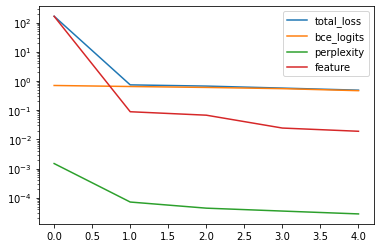

In [8]:
pd.DataFrame(res).T.plot(logy=True)

In [ ]:
batch_d = next(iter(dl))

In [ ]:
batch_d

****

In [9]:
hvs_all = datasets.HarvardSentences(hvs_tuples, pre_processing_pipeline='audio_gate')

2022-03-17 23:13:00,003 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - DEBUG - preparing pipeline


2022-03-17 23:13:00 | DEBUG | ecog_speech.datasets.HarvardSentences | preparing pipeline


2022-03-17 23:13:00,004 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - DEBUG - Available pipelines: ['audio_gate', 'audio_gate_speaking_only', 'audio_gate_imagine', 'default']


2022-03-17 23:13:00 | DEBUG | ecog_speech.datasets.HarvardSentences | Available pipelines: ['audio_gate', 'audio_gate_speaking_only', 'audio_gate_imagine', 'default']


2022-03-17 23:13:00,005 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - 'audio_gate' pipeline selected


2022-03-17 23:13:00 | INFO | ecog_speech.datasets.HarvardSentences | 'audio_gate' pipeline selected


2022-03-17 23:13:00,005 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - Loading data directly


2022-03-17 23:13:00 | INFO | ecog_speech.datasets.HarvardSentences | Loading data directly


Loading data:   0%|          | 0/1 [00:00<?, ?it/s]

2022-03-17 23:13:00,017 - ecog_speech.datasets.HarvardSentences.load_data - INFO - ---28-1-1-UCSD---


2022-03-17 23:13:00 | INFO | ecog_speech.datasets.HarvardSentences | ---28-1-1-UCSD---


2022-03-17 23:13:00,017 - ecog_speech.datasets.HarvardSentences.load_data - INFO - |--->Using Subset: Data


2022-03-17 23:13:00 | INFO | ecog_speech.datasets.HarvardSentences | |--->Using Subset: Data


2022-03-17 23:13:00,018 - ecog_speech.datasets.HarvardSentences.make_filename - INFO - Harvard sentences only uses location and patient identifiers


2022-03-17 23:13:00 | INFO | ecog_speech.datasets.HarvardSentences | Harvard sentences only uses location and patient identifiers


2022-03-17 23:13:00,018 - ecog_speech.datasets.HarvardSentences.load_data - DEBUG - Path : /export/Projects_GOLIATH/CMSCResearch/ECOGSpeech/ecog_speech/../data/HarvardSentences/UCSD/Data/UCSD28_Task_1.mat


2022-03-17 23:13:00 | DEBUG | ecog_speech.datasets.HarvardSentences | Path : /export/Projects_GOLIATH/CMSCResearch/ECOGSpeech/ecog_speech/../data/HarvardSentences/UCSD/Data/UCSD28_Task_1.mat


2022-03-17 23:13:00,023 - ecog_speech.datasets.HarvardSentences.load_mat_from_path - INFO - Couldn't load UCSD28_Task_1.mat with scipy (vers > 7.3?) - using package 'mat73' to load


2022-03-17 23:13:00 | INFO | ecog_speech.datasets.HarvardSentences | Couldn't load UCSD28_Task_1.mat with scipy (vers > 7.3?) - using package 'mat73' to load


2022-03-17 23:13:04,757 - ecog_speech.datasets.HarvardSentences.load_data - DEBUG - Matlab keys : ['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_r_a_s', 'sEEG_signal', 'start_stop_word_ms', 'stimcode']


2022-03-17 23:13:04 | DEBUG | ecog_speech.datasets.HarvardSentences | Matlab keys : ['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_r_a_s', 'sEEG_signal', 'start_stop_word_ms', 'stimcode']


2022-03-17 23:13:04,759 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.process - DEBUG - Accessing fs_signal


2022-03-17 23:13:04 | DEBUG | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | Accessing fs_signal


2022-03-17 23:13:04,760 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.process - DEBUG - Input source frequency, fs object: 1024.0


2022-03-17 23:13:04 | DEBUG | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | Input source frequency, fs object: 1024.0


2022-03-17 23:13:04,772 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.process - INFO - sEEG_signal@1024, shape: (900001, 108), [(Timedelta('0 days 00:00:00'), Timedelta('0 days 00:14:38.906250'))]


2022-03-17 23:13:04 | INFO | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | sEEG_signal@1024, shape: (900001, 108), [(Timedelta('0 days 00:00:00'), Timedelta('0 days 00:14:38.906250'))]


2022-03-17 23:13:04,772 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.transform - DEBUG - Updated keys: {'fs_signal', 'signal'}


2022-03-17 23:13:04 | DEBUG | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | Updated keys: {'fs_signal', 'signal'}


2022-03-17 23:13:04,773 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.process - DEBUG - Accessing fs_audio


2022-03-17 23:13:04 | DEBUG | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | Accessing fs_audio


2022-03-17 23:13:04,773 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.process - DEBUG - Input source frequency, fs object: 48000.0


2022-03-17 23:13:04 | DEBUG | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | Input source frequency, fs object: 48000.0


2022-03-17 23:13:05,355 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.process - INFO - audio@48000, shape: (42187547,), [(Timedelta('0 days 00:00:00'), Timedelta('0 days 00:14:38.907208333'))]


2022-03-17 23:13:05 | INFO | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | audio@48000, shape: (42187547,), [(Timedelta('0 days 00:00:00'), Timedelta('0 days 00:14:38.907208333'))]


2022-03-17 23:13:05,356 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.transform - DEBUG - Updated keys: {'audio', 'fs_audio'}


2022-03-17 23:13:05 | DEBUG | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | Updated keys: {'audio', 'fs_audio'}


2022-03-17 23:13:05,356 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.process - DEBUG - Accessing fs_signal


2022-03-17 23:13:05 | DEBUG | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | Accessing fs_signal


2022-03-17 23:13:05,357 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.process - DEBUG - Input source frequency, fs object: 1024


2022-03-17 23:13:05 | DEBUG | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | Input source frequency, fs object: 1024


2022-03-17 23:13:05,367 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.process - INFO - stimcode@1024, shape: (900001,), [(Timedelta('0 days 00:00:00'), Timedelta('0 days 00:14:38.906250'))]


2022-03-17 23:13:05 | INFO | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | stimcode@1024, shape: (900001,), [(Timedelta('0 days 00:00:00'), Timedelta('0 days 00:14:38.906250'))]


2022-03-17 23:13:05,368 - ecog_speech.pipeline.ParseTimeSeriesArrToFrame.transform - DEBUG - Updated keys: {'fs_signal', 'stim'}


2022-03-17 23:13:05 | DEBUG | ecog_speech.pipeline.ParseTimeSeriesArrToFrame | Updated keys: {'fs_signal', 'stim'}


2022-03-17 23:13:05,368 - ecog_speech.pipeline.IdentifyGoodAndBadSensors.process - WARNING - Electrodes with key electrodes not found among ['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_r_a_s', 'sEEG_signal', 'start_stop_word_ms', 'stimcode', 'signal', 'stim']


2022-03-17 23:13:05 | WARNING | ecog_speech.pipeline.IdentifyGoodAndBadSensors | Electrodes with key electrodes not found among ['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_r_a_s', 'sEEG_signal', 'start_stop_word_ms', 'stimcode', 'signal', 'stim']


2022-03-17 23:13:05,369 - ecog_speech.pipeline.IdentifyGoodAndBadSensors.transform - DEBUG - Updated keys: {'good_sensor_columns', 'bad_sensor_columns'}


2022-03-17 23:13:05 | DEBUG | ecog_speech.pipeline.IdentifyGoodAndBadSensors | Updated keys: {'good_sensor_columns', 'bad_sensor_columns'}


2022-03-17 23:13:05,369 - ecog_speech.pipeline.SubsampleSignal.transform - DEBUG - Updated keys: {'fs_signal', 'signal', 'stim'}


2022-03-17 23:13:05 | DEBUG | ecog_speech.pipeline.SubsampleSignal | Updated keys: {'fs_signal', 'signal', 'stim'}


2022-03-17 23:13:06,075 - ecog_speech.pipeline.SentCodeFromStartStopWordTimes.process - WARNING - Sent code 45.0 has a time rang more than a minute: 0 days 00:01:20.365234375


2022-03-17 23:13:06 | WARNING | ecog_speech.pipeline.SentCodeFromStartStopWordTimes | Sent code 45.0 has a time rang more than a minute: 0 days 00:01:20.365234375


2022-03-17 23:13:06,139 - ecog_speech.pipeline.SentCodeFromStartStopWordTimes.transform - DEBUG - Updated keys: {'word_start_stop_times', 'sent_start_stop_time', 'stim'}


2022-03-17 23:13:06 | DEBUG | ecog_speech.pipeline.SentCodeFromStartStopWordTimes | Updated keys: {'word_start_stop_times', 'sent_start_stop_time', 'stim'}


2022-03-17 23:13:07,194 - ecog_speech.pipeline.StimFromStartStopTimes.transform - DEBUG - Updated keys: {'word_stim', 'sentence_stim'}


2022-03-17 23:13:07 | DEBUG | ecog_speech.pipeline.StimFromStartStopTimes | Updated keys: {'word_stim', 'sentence_stim'}


2022-03-17 23:13:07,194 - ecog_speech.pipeline.PowerThreshold.power_threshold - INFO - Power threshold


2022-03-17 23:13:07 | INFO | ecog_speech.pipeline.PowerThreshold | Power threshold


2022-03-17 23:13:31,205 - ecog_speech.pipeline.PowerThreshold.power_threshold - INFO - Using speaking quantile


2022-03-17 23:13:31 | INFO | ecog_speech.pipeline.PowerThreshold | Using speaking quantile


2022-03-17 23:14:06,178 - ecog_speech.pipeline.PowerThreshold.power_threshold - INFO - Using silence nsmallest on <class 'pandas.core.series.Series'>


2022-03-17 23:14:06 | INFO | ecog_speech.pipeline.PowerThreshold | Using silence nsmallest on <class 'pandas.core.series.Series'>


2022-03-17 23:14:06,189 - ecog_speech.pipeline.PowerThreshold.power_threshold - WARNING - stim_s and stim_auto not equal: 290 - 1 != 249


2022-03-17 23:14:06 | WARNING | ecog_speech.pipeline.PowerThreshold | stim_s and stim_auto not equal: 290 - 1 != 249


2022-03-17 23:14:06,196 - ecog_speech.pipeline.PowerThreshold.transform - DEBUG - Updated keys: {'silence_stim_pwrt_s', 'rolling_audio_pwr', 'stim_pwrt_diff', 'coded_silence_stim', 'stim_pwrt', 'silence_stim_pwrt_diff_s'}


2022-03-17 23:14:06 | DEBUG | ecog_speech.pipeline.PowerThreshold | Updated keys: {'silence_stim_pwrt_s', 'rolling_audio_pwr', 'stim_pwrt_diff', 'coded_silence_stim', 'stim_pwrt', 'silence_stim_pwrt_diff_s'}


2022-03-17 23:14:06,197 - ecog_speech.pipeline.WindowSampleIndicesFromStim.make_sample_indices - INFO - (512, Timedelta('0 days 00:00:00.500000'))


2022-03-17 23:14:06 | INFO | ecog_speech.pipeline.WindowSampleIndicesFromStim | (512, Timedelta('0 days 00:00:00.500000'))


2022-03-17 23:14:06,197 - ecog_speech.pipeline.WindowSampleIndicesFromStim.make_sample_indices - INFO - Samples per window: 256


2022-03-17 23:14:06 | INFO | ecog_speech.pipeline.WindowSampleIndicesFromStim | Samples per window: 256


Processing stim regions:   0%|          | 0/249 [00:00<?, ?it/s]

2022-03-17 23:14:12,974 - ecog_speech.pipeline.WindowSampleIndicesFromStim.transform - DEBUG - Updated keys: {'sample_index_map', 'n_samples_per_window'}


2022-03-17 23:14:12 | DEBUG | ecog_speech.pipeline.WindowSampleIndicesFromStim | Updated keys: {'sample_index_map', 'n_samples_per_window'}


2022-03-17 23:14:13,746 - ecog_speech.pipeline.WindowSampleIndicesFromIndex.transform - DEBUG - Updated keys: {'sample_index_map', 'n_samples_per_window'}


2022-03-17 23:14:13 | DEBUG | ecog_speech.pipeline.WindowSampleIndicesFromIndex | Updated keys: {'sample_index_map', 'n_samples_per_window'}


2022-03-17 23:14:13,747 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - N samples per window: 256


2022-03-17 23:14:13 | INFO | ecog_speech.datasets.HarvardSentences | N samples per window: 256


2022-03-17 23:14:13,803 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - GOOD AND BAD SENSORS: {('UCSD', 28, 1, 1): ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107], None)}


2022-03-17 23:14:13 | INFO | ecog_speech.datasets.HarvardSentences | GOOD AND BAD SENSORS: {('UCSD', 28, 1, 1): ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107], None)}


2022-03-17 23:14:13,804 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - Selected columns with -union- method: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107


2022-03-17 23:14:13 | INFO | ecog_speech.datasets.HarvardSentences | Selected columns with -union- method: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107


2022-03-17 23:14:13,805 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - Selected 108 sensors


2022-03-17 23:14:13 | INFO | ecog_speech.datasets.HarvardSentences | Selected 108 sensors


Applying sensor selection:   0%|          | 0/1 [00:00<?, ?it/s]

2022-03-17 23:14:13,885 - ecog_speech.pipeline.ApplySensorSelection.transform - DEBUG - Updated keys: {'signal'}


2022-03-17 23:14:13 | DEBUG | ecog_speech.pipeline.ApplySensorSelection | Updated keys: {'signal'}


In [10]:
dl_all = hvs_all.to_dataloader(num_workers=4, batch_size=512, random_sample=False)

In [11]:
from tqdm.auto import tqdm
import torch
results_l = list()
for batch_d in tqdm(dl_all, desc="Batching"):
    X_barr = batch_d['signal_arr'].to(trainer.device)
    # Select a single sensor for now and remove the singleton dimension
    X = X_barr.select(1, np.random.randint(0, X_barr.shape[1])).unsqueeze(1)
    with torch.no_grad():
        feat_d = cog2vec.forward(X, features_only=True, mask=False)
        results_l.append(
            dict(text_arr=batch_d['text_arr'],
                **{n:arr.detach().cpu().numpy() for n, arr in feat_d.items()}))

Batching:   0%|          | 0/104 [00:00<?, ?it/s]

TODO: Inspect model outputs